In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance
from itertools import product
import seaborn as sns
import pandas as pd
import numpy as np

from feature_importance_techniques import *

In [2]:
FREQ = "1D"

In [3]:
def get_test_data(
    n_features=40, n_informative=10, n_redundant=10, n_samples=10000, n_classes=2, weights=[0.5, 0.5], shuffle=True
):
    # generate a random dataset for a classification problem
    from sklearn.datasets import make_classification

    trnsX, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        shuffle=shuffle,
        n_classes=n_classes,
        weights=weights,
    )
    df = pd.date_range(periods=n_samples, end=pd.datetime.today(), freq=FREQ)
    df0 = pd.DatetimeIndex(df)
    trnsX, y = pd.DataFrame(trnsX, index=df0), pd.Series(y, index=df0)
    df0 = ["I_" + str(i) for i in range(n_informative)] + ["R_" + str(i) for i in range(n_redundant)]
    df0 += ["N_" + str(i) for i in range(n_features - len(df0))]
    trnsX.columns = df0

    return trnsX, y

In [4]:
X, y = get_test_data(12, 4, 6, n_samples=1000)

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [29]:
clf = LGBMClassifier()
cv = StratifiedKFold(n_splits=10)
scores = cv_score(clf, X, y, f1_score, cv)

FOLD: 1 SCORE: 0.9052631578947369
FOLD: 2 SCORE: 0.8775510204081631
FOLD: 3 SCORE: 0.8913043478260869
FOLD: 4 SCORE: 0.8791208791208791
FOLD: 5 SCORE: 0.9166666666666666
FOLD: 6 SCORE: 0.8367346938775511
FOLD: 7 SCORE: 0.8990825688073395
FOLD: 8 SCORE: 0.8659793814432989
FOLD: 9 SCORE: 0.9278350515463918
FOLD: 10 SCORE: 0.9


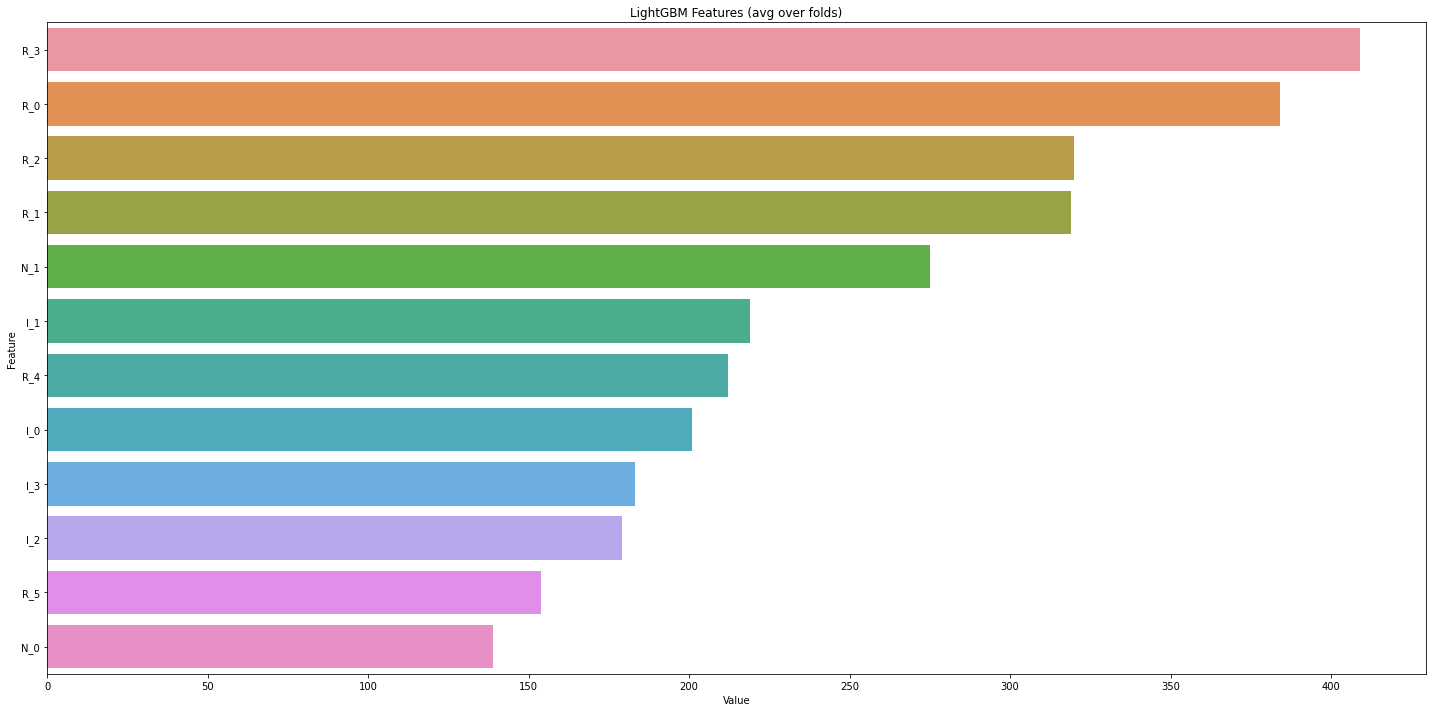

<Figure size 432x288 with 0 Axes>

In [49]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances.png')

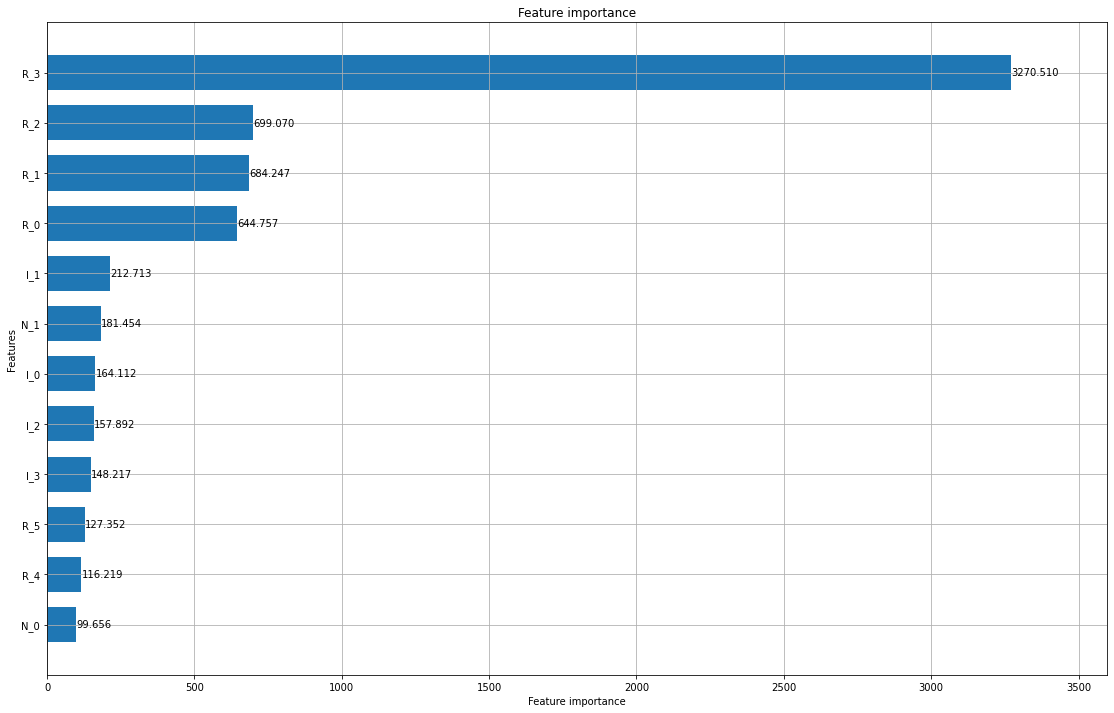

In [44]:
plot_importance(
    clf, 
    height=0.7,
    title='Feature importance', 
    xlabel='Feature importance', 
    ylabel='Features', 
    importance_type='gain', 
    grid=True, 
    precision=3,
    figsize=(19, 12)
);

In [ ]:
df, imp = compute_features(
        X,
        y,
        cv,
        f1_score,
        clf=clf,
        methods=["MDA", "SFI", "MDI", "MI", "CFI", "SHAP"],
)

MDA
SFI
MDI
MI
CFI
SHAP


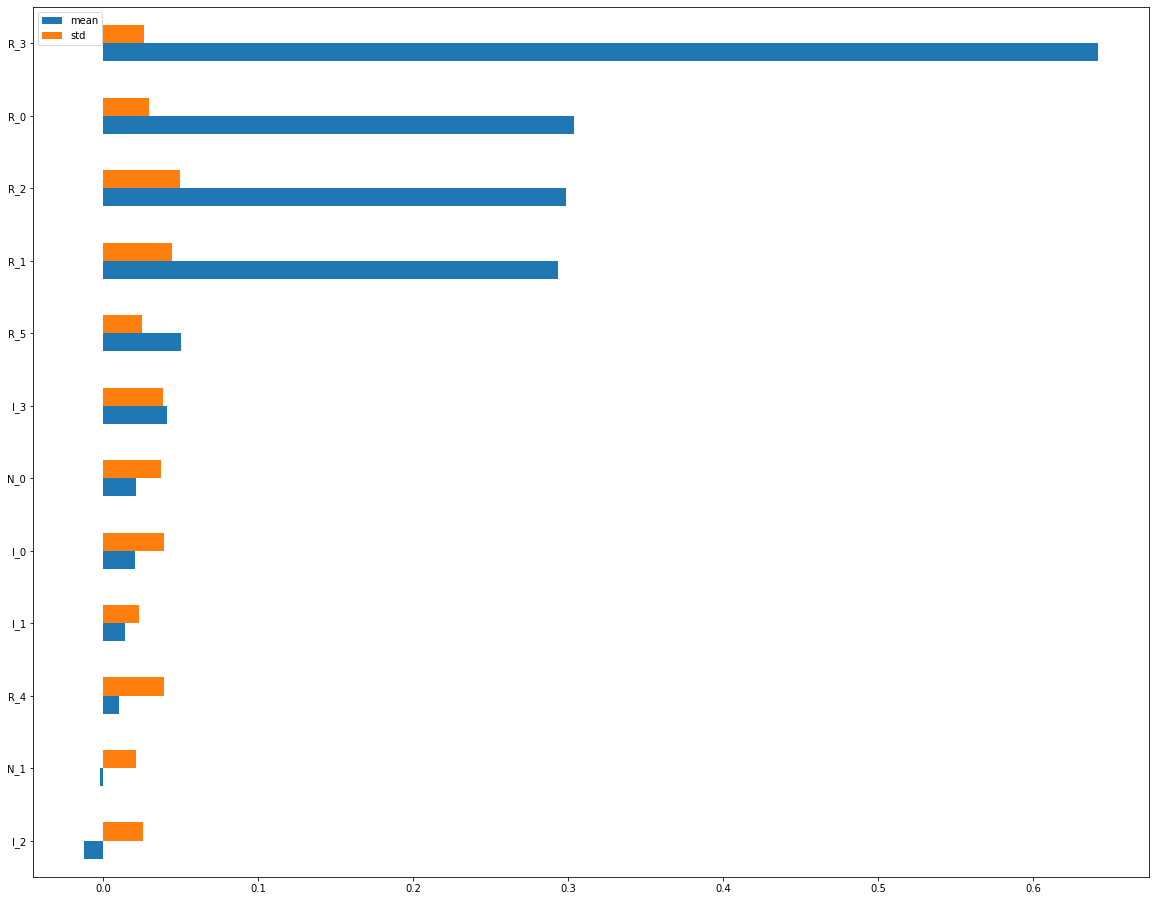

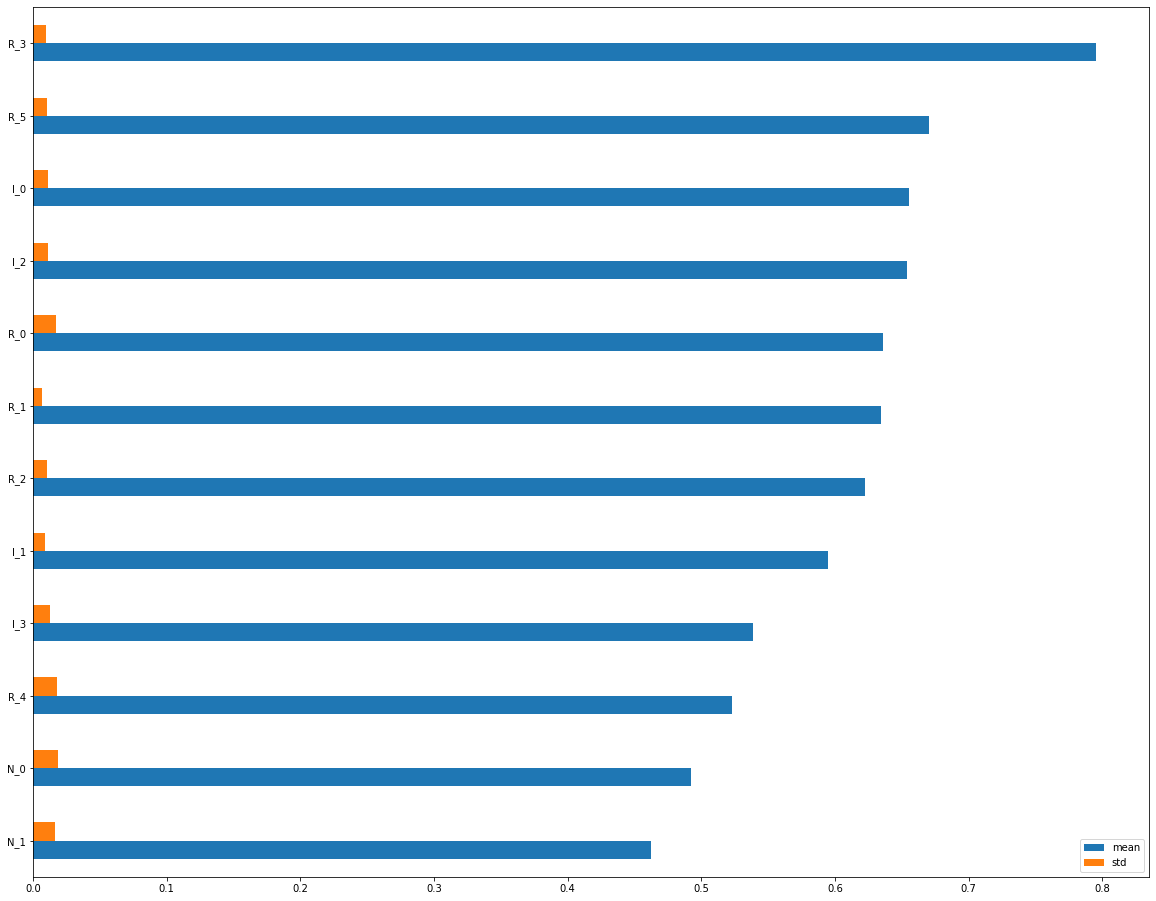

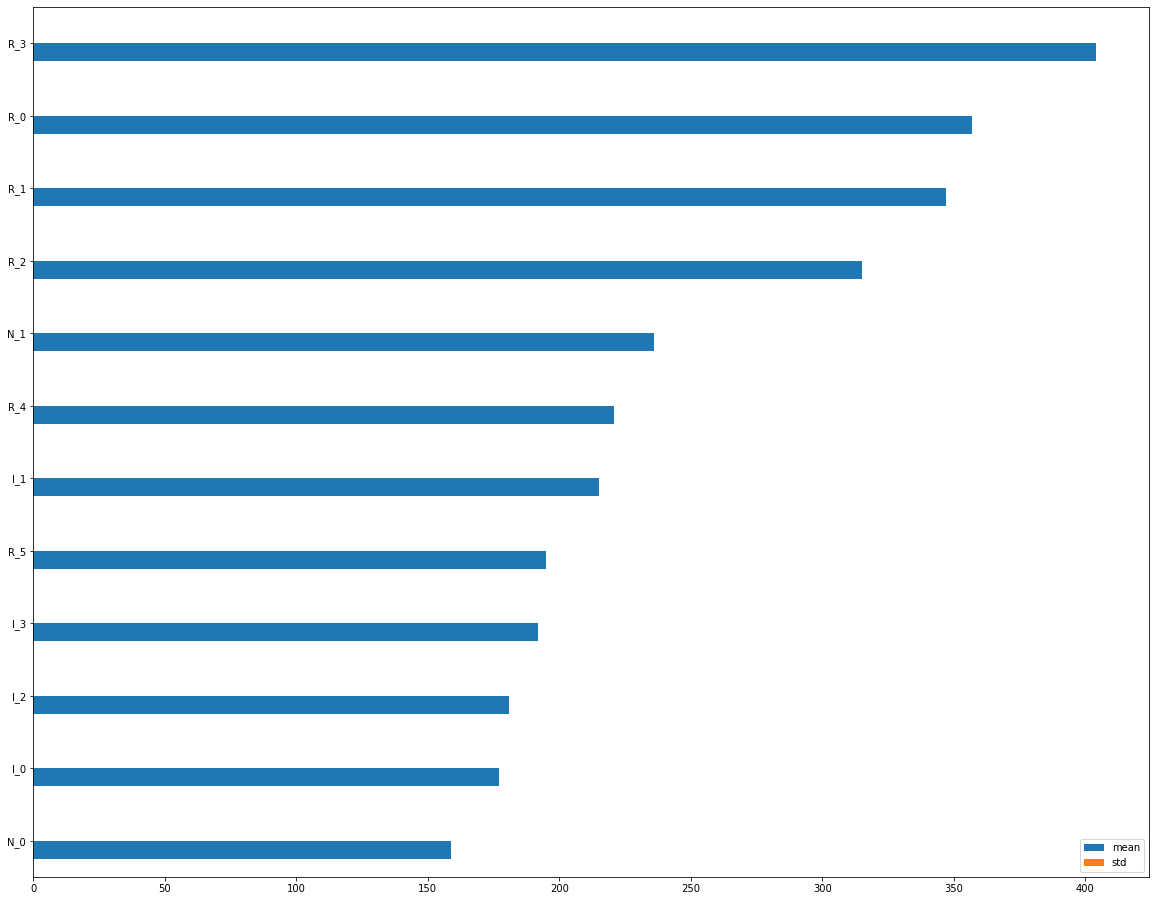

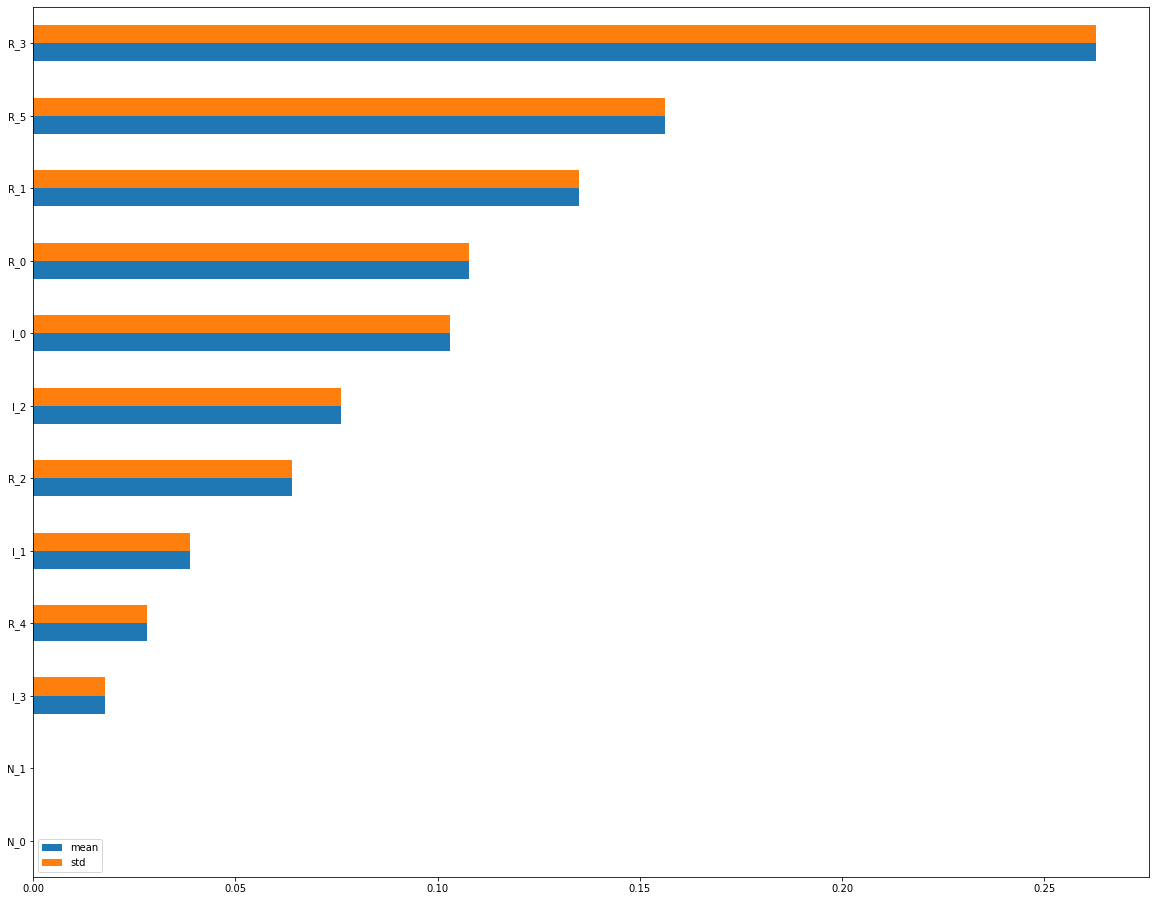

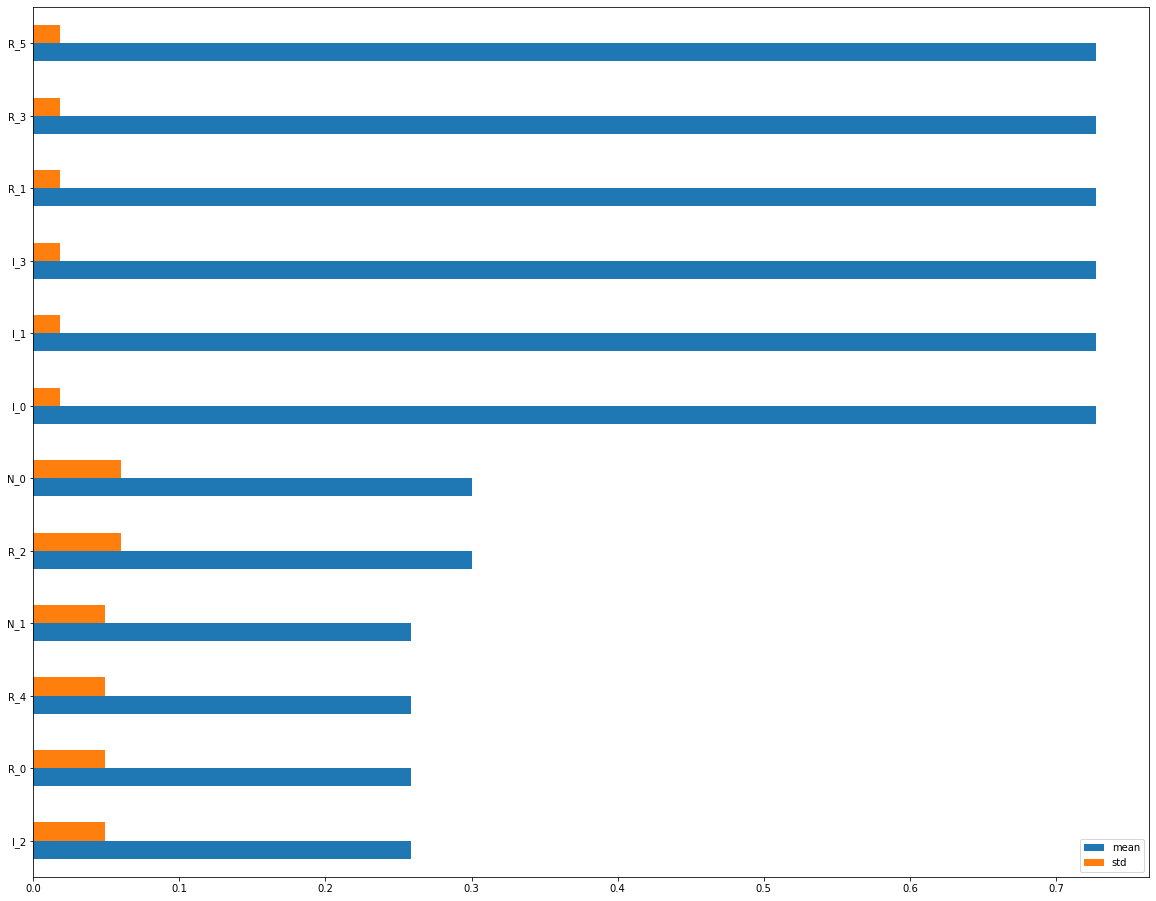

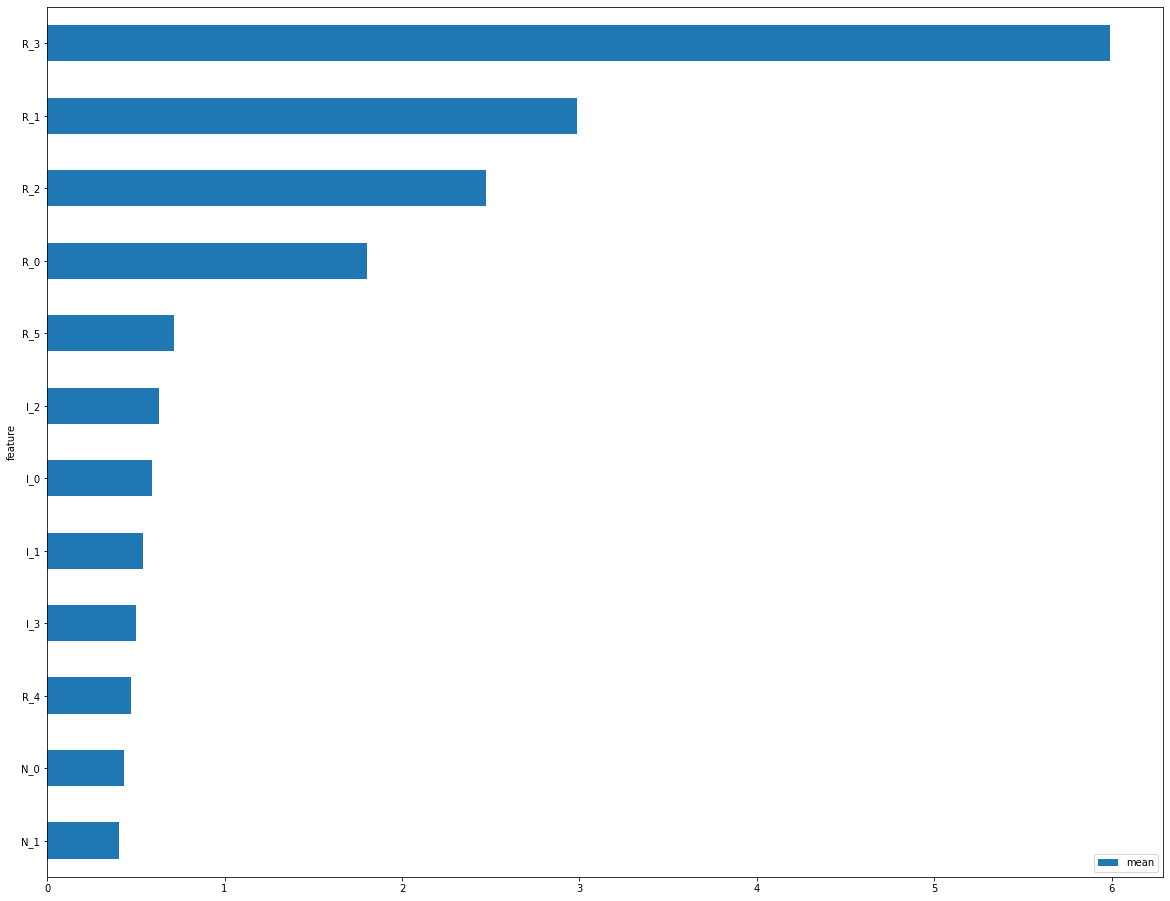

In [8]:
for name_i, importance_i in zip(df['method'], imp):
    print(name_i)
    importance_i.sort_values('mean').plot.barh(figsize=(20, 16))

In [17]:
importances = df.drop(columns='oos', axis=1).set_index('method')

In [18]:
importances.mean().sort_values(ascending=False)

R_3    0.224566
R_1    0.133679
R_0    0.106464
R_2    0.103466
R_5    0.084443
I_0    0.070049
I_1    0.058845
I_3    0.054995
I_2    0.049870
R_4    0.041699
N_0    0.034619
N_1    0.034612
dtype: float64

In [19]:
importances.median().sort_values(ascending=False)

R_3    0.200089
R_1    0.128831
R_0    0.105793
R_2    0.095269
R_5    0.078537
I_0    0.074552
I_1    0.055460
I_2    0.051739
I_3    0.046253
N_0    0.037382
R_4    0.035756
N_1    0.033158
dtype: float64

In [20]:
importances.std().sort_values(ascending=False)

R_3    0.118401
R_5    0.049139
R_2    0.047214
R_0    0.043871
I_0    0.042374
I_1    0.040706
I_3    0.039619
I_2    0.034445
N_1    0.032996
R_1    0.032873
R_4    0.026791
N_0    0.026302
dtype: float64